In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl


import mglearn
import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()    
# 한글폰트가 기본적으로 없다.  그래서 따로 등록해서 사용하면 됨
font_name
#(c\windows\fonts  가 기본폰트)

plt.rc('font', family=font_name)

# - 마이너스 표시도 깨진다.
mpl.rcParams["axes.unicode_minus"]=False    #마이너스를 문자로 쓰지 않고 숫자로 쓰겠다. 라는 뜻

import keras
from keras.models import Sequential, load_model
from keras.layers.core import Dense, Dropout
from keras.optimizers import RMSprop
from keras.utils import np_utils
from keras.callbacks import EarlyStopping, TensorBoard

<font color=red>

## Keras
</font>
    
    - 파이썬으로 구현된 쉽고 간결한 딥러닝 라이브러리
    - 구글 엔지니어 프랑소와 숄레가 2015년 3월에 발표
    - 내부적으로는 텐서플로우 엔진이 구동되지만 직관적인 API로 쉽게 딥러닝 실험을 할 수 있도록 지원
    ※「케라스 창시자에게 배우는 딥러닝」 선생님이 추천하심 :)
    
    - Keras 라이브러리 설치 : dos에서 pip install keras
    
    1. Keras 특징
        - 모듈화
        - 최소주의

    2. keras가 지원하는 엔진
        - TensorFlow, theano
        - Using TensorFlow backend : 
            - C:\Users\acorn\.keras\keras.json : 설정환경파일에 "backend": "tensorflow"로 설정되어있음
            
    3. 조기 종료 기능 : EarlyStopping()

---
<font color=red>

### 다중선형회귀모델(TensorFlow랑 비교하기)
</font>

In [ ]:
# 데이터 불러오기
np.random.seed()
data = np.genfromtxt("data/x09.txt", skip_header=36)
data

"""
혈당 수치에 따른 머시기
Index / One / Weight (kilograms) / Age (Years) / Blood fat content(종속변수)
array([[  1.,   1.,  84.,  46., 354.],
       [  2.,   1.,  73.,  20., 190.],
"""

In [ ]:
##### 가설설정 비교 #####

# 독립변수 / 종속변수 설정?
X = np.array(data[:, 2:4], dtype=np.float) # 독립변수 : 컬럼 3, 4
y = np.array(data[:, 4], dtype=np.float) # 종속변수 : 컬럼 5

## 훈련데이터를 작업하고 텐서에서는 graph 작업을 해서 가설을 설정
## → 케라스에서는 from keras.models import Sequential 를 사용하면 가설을 간단하게 사용할 수 있음
"""
    [ TensorFlow 가설 설정 ]
# Matrix로 처리하는 경우
X = tf.placeholder(tf.float32, shape=[None, 3]) # 5개로 들어와서 3개로 나감
Y = tf.placeholder(tf.float32, shape=[None, 1])

W = tf.Variable(tf.random_normal([3, 1])) # 3개로 들어와서 1개로 나감
b = tf.Variable(tf.random_normal([1]))

# 가설 설정
hypothesis = tf.matmul(X, W) + b
========================================================
    [ Keras 가설 설정 ]
model = Sequential()
model.add(Dense(1, input_shape=(2, )))
"""
model = Sequential() # 얘가 다 해줄거임 흐
# Dense(출력개수, input_shape=출력개수)
model.add(Dense(1, input_shape=(2, ))) # (2개 26행인데 26행을 설정안하고 공란으로 처리(텐서에서 None으로 했던거처럼))

In [ ]:
##### 비용처리 #####
"""
    [ TensorFlow 비용처리 ]
# 비용 함수
cost = tf.reduce_mean(tf.square(hypothesis-y))

# 최소비용 계산
train = tf.train.GradientDescentOptimizer(learning_rate=1e-5).minimize(cost)
========================================================
    [ Keras 비용처리 ]
model.compile(loss='msq', optimizer=RMSprop(lr=0.01))
"""

model.compile(loss='mse', optimizer=RMSprop(lr=0.01))
## 최저비용 mse(mean square error) 공식 / 알고리즘 RMSprop을 사용하겠다고 설정한 것
## ※ RMSprop : 선형회귀에서 많이 사용하는 알고리즘

In [ ]:
##### 레포트 #####
model.summary()

In [ ]:
##### 훈련시키기 #####
"""
    [ TensorFlow 훈련 ]
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(2001):
        _, hy, co = sess.run([train, hypothesis, cost], feed_dict={X:x_data, y:y_data})
        if step % 100 == 0:
            print("step : {} / co : {} / hy : {}".format(step, co, hy))
========================================================
    [ Keras 훈련 ]
hist = model.fit(X, y, epochs=1000)
"""
hist = model.fit(X, y, epochs=1000)

In [ ]:
# 훈련된 데이터 확인
# print(hist.history.keys()) # → dict_keys(['loss'])
# print(hist.history["loss"])

# 그래프 그리기
plt.plot(hist.history["loss"])

In [ ]:
##### 예측하기 #####
"""
    [ TensorFlow 예측 ]

========================================================
    [ Keras 예측 ]
model.predict(np.array([100, 40]).reshape(1, 2))
"""
# 체중이 100이고 나이가 40일때의 혈당은?
model.predict(np.array([100, 40]).reshape(1, 2)) # Dense(1, input_shape=(2, ) 에 맞게 차원 맞춰서 값 입력

## 회귀선이 필요하시다면 알려드리는게 인지상정 / 가중치, 절편 확인하기
w, b = model.get_weights()

---
<font color=red>

### 보스턴 주택가격을 사용한 회귀분석
</font>

In [ ]:
from keras.datasets import boston_housing
(train_data, train_target), (test_data, test_target) = boston_housing.load_data()

In [ ]:
# 데이터 확인
print(train_data.shape, test_data.shape)
print(train_target[:10])

In [ ]:
##### 정규화 #####
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

In [ ]:
##### 가설설정 #####
model = Sequential()

# 딥러닝할때 레이어마다 출력개수 임의설정 가능~ 마지막 출력 계층만 데이터에 맞게 해주면 됨~
### 레이어 1 ###
model.add(Dense(64, input_shape=(train_data.shape[1], ), activation='relu'))
## activation='엑티베이션종류'액티베이션 직접설정할 때 (액티베이션의 종류에 따라 성능이 차이가 나니까)
### 레이어 2 ###
model.add(Dense(64, activation='relu'))
## 위위에서 설정한 출력개수 64를 입력개수로 다시 받아와야쥬
## 그취만 이 친구는 출력개수를 자동으로 입력개수로 전달받을 수 있어서 생략하면 알아서 64로 받아들입니당
### 레이어 마지막~ ###
model.add(Dense(1))

model.summary()

In [ ]:
##### 비용처리 #####
model.compile(loss='mse', optimizer='rmsprop', metrics=["mae"])
## 러닝레이트를 사용하지 않을꺼면 임포트 안하고 알고리즘 종류만 알려줘도 됨
## metrics=["mae"] : mae(mean 절대값 error) / 별도 지정이 없을때는 accuracy(정확도)?였나 로 지정됨

In [ ]:
##### 훈련 #####
model.fit(train_data, train_target, epochs=100, batch_size=1, verbose=1)

## 훈련 성능이 좋지 못함
## 데이터 정규화를 위에서 다시 하고 와야게씀

In [ ]:
mse, mae = model.evaluate(test_data, test_target, verbose=1)
print(mse, mae)

---
<font color=red>

### 인공신경망
</font>

In [ ]:
X = np.array([0, 1, 2, 3, 4])
y = X*2 + 1

model = Sequential()
model.add(Dense(1, input_shape=(1, )))
model.compile(loss='mse', optimizer='SGD')
model.fit(X, y, epochs=500, verbose=1)

print("Tatget : ",y[2:])
print("predict : ", model.predict(X[2:]))

In [ ]:
##### 손글씨 데이터 불러오기 #####

from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [ ]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)
print(y_train[:10])

In [ ]:
# one-hot encoding

y_train = np_utils.to_categorical(y_train) # 데이터를 범주화시켜주는 함수
y_test = np_utils.to_categorical(y_test)

In [ ]:
print(y_train[:10])

In [ ]:
# 훈련시 2차원으로 데이터 입력해야하니까 reshape~~
X_train = X_train.reshape(60000, 28*28)/255
X_test = X_test.reshape(10000, 28*28)/255

In [ ]:
# validation 분할
x_val = X_train[:12600] # 데이터를 테스트용으로 잘라놓고
X_train = X_train[12600:] # 나머지 데이터를 다시 훈련용으로

y_val = y_train[:12600] # 정답을 테스트용으로 잘라놓고
y_train = y_train[12600:] # 나머지 정답을 다시 훈련용으로

In [ ]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

In [ ]:
model = Sequential()

model.add(Dense(64, input_shape=(X_train.shape[1], ), activation='relu')) # 레이어1 (28*28)
# = model.add(Dense(64, input_dim=y_train.shape[1]*y_train.shape[1], activation='relu'))
model.add(Dense(10, activation='softmax')) # 출력계층 (0~9까지 10개)

model.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])
## 여긴 회귀분석이 아니니까 평균제곱오차 말고 딴거를 써야할 것 같아욤
## 여기서는 'categorical_crossentropy'쓸거고 / 필요한 경우에는 도큐먼트가서 비용계산방법 찾아보기

model.summary()

In [ ]:
model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=[x_val, y_val])
## validation_data(훈련데이터로 유효성(자체적인 적합도 검정)을 미리 검사할 수 있는 알고리즘) 사용 가능
## ↑ 이거를 하려면 위에 validation 분할처리를 미리 해줘야함

---
<font color=red>

### 이미지데이터라서 픽셀마다 값이 0~255라 정규화가 필요하대염 :) 그럼 나도 나중에 색이나 이미지로 뭐 해먹을라면 정규화해야겠네</br>

X_train = X_train.reshape(60000, 28*28)/255</br>

X_test = X_test.reshape(10000, 28*28)/255
</font>

In [ ]:
result = model.evaluate(X_test, y_test, batch_size=32)
print(result)

In [ ]:
# 실제 데이터의 인덱스 랜덤하게 뽑고
xhat_idx = np.random.choice(X_test.shape[0], 10)
xhat_idx

In [ ]:
# 인덱스에 맞는 실제데이터 갖고와서
xhat = X_test[xhat_idx]
xhat

In [ ]:
# 예측을 돌려보고
yhat = model.predict_classes(xhat)
yhat

In [ ]:
# 몇개맞췄나 보자
for i in range(10):
    print("True : ", np.argmax(y_test[xhat_idx[i]]), ", predict : ", yhat[i])

In [ ]:
##### 그래프 시각화(위 코드 한번에 붙인거) #####

from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# one-hot encoding
y_train = np_utils.to_categorical(y_train) # 데이터를 범주화시켜주는 함수
y_test = np_utils.to_categorical(y_test)

# 훈련시 2차원으로 데이터 입력해야하니까 reshape~~
X_train = X_train.reshape(60000, 28*28)/255
X_test = X_test.reshape(10000, 28*28)/255

# validation 분할
x_val = X_train[:12600] # 데이터를 테스트용으로 잘라놓고
X_train = X_train[12600:] # 나머지 데이터를 다시 훈련용으로
y_val = y_train[:12600] # 정답을 테스트용으로 잘라놓고
y_train = y_train[12600:] # 나머지 정답을 다시 훈련용으로

# 모델 구성
model = Sequential()
model.add(Dense(64, input_shape=(X_train.shape[1], ), activation='relu')) # 레이어1 (28*28)
model.add(Dense(10, activation='softmax')) # 출력계층 (0~9까지 10개)
model.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])

# 텐서보드 설정 : tensorboard --logdir=graph
tf_hist = keras.callbacks.TensorBoard(log_dir="./graph", write_graph=True, write_images=True)

# 모델 훈련
hist = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(x_val, y_val),
                 callbacks=[tf_hist])

In [ ]:
# 모델 저장 → 재실행할때 이전 코드 다시 실행 안하고 다시 불러와유
model.save("data/mnist_model.h5")

In [3]:
# 모델 불러오기
model = load_model("data/mnist_model.h5")

Instructions for updating:
If using Keras pass *_constraint arguments to layers.



In [4]:
# 불러온 데이터로 예측값 뽑아봅시다
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_test = X_test.reshape(10000, 784).astype("float32")/255.0
y_test = np_utils.to_categorical(y_test)

# 실제 데이터의 인덱스 랜덤하게 뽑고
xhat_idx = np.random.choice(X_test.shape[0], 10)
# 인덱스에 맞는 실제데이터 갖고와서
xhat = X_test[xhat_idx]
# 예측을 돌려보고
yhat = model.predict_classes(xhat)
# 몇개맞췄나 보자
for i in range(10):
    print("True : ", np.argmax(y_test[xhat_idx[i]]), ", predict : ", yhat[i])

True :  8 , predict :  8
True :  8 , predict :  8
True :  7 , predict :  7
True :  5 , predict :  5
True :  5 , predict :  5
True :  7 , predict :  2
True :  5 , predict :  5
True :  1 , predict :  1
True :  5 , predict :  5
True :  6 , predict :  6


In [5]:
result = model.evaluate(X_test, y_test, batch_size=32)
print(result)

10000/10000 [==============================] - 0s 18us/step
[0.24587728255987168, 0.9294999837875366]


---
<font color=red>

### 조기종료
</font>

    - EarlyStopping(monitor='val_loss', min_data=0, patience=10)
        : 학습효과가 없을 때 학습을 조기 종료시켜줌
        - monitor : 관찰하고자 하는 항목, val_loss나 val_acc에 주로 사용
        - min_data : 개선되고 있다고 판단하기 위한 최소 변화량 / 보통 0을 지정
        - patience : 지정된 값까지 기다렸다가 종료

In [9]:
##### 그래프 시각화(위 코드 한번에 붙인거) #####

from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# one-hot encoding
y_train = np_utils.to_categorical(y_train) # 데이터를 범주화시켜주는 함수
y_test = np_utils.to_categorical(y_test)

# 훈련시 2차원으로 데이터 입력해야하니까 reshape~~
X_train = X_train.reshape(60000, 28*28)/255
X_test = X_test.reshape(10000, 28*28)/255

# validation 분할
x_val = X_train[:12600] # 데이터를 테스트용으로 잘라놓고
X_train = X_train[12600:] # 나머지 데이터를 다시 훈련용으로
y_val = y_train[:12600] # 정답을 테스트용으로 잘라놓고
y_train = y_train[12600:] # 나머지 정답을 다시 훈련용으로

# 모델 구성
model = Sequential()
model.add(Dense(64, input_shape=(X_train.shape[1], ), activation='relu')) # 레이어1 (28*28)
model.add(Dense(10, activation='softmax')) # 출력계층 (0~9까지 10개)
model.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])

# 텐서보드 설정 : tensorboard --logdir=graph
# tf_hist = keras.callbacks.TensorBoard(log_dir="./graph", write_graph=True, write_images=True)
tf_hist = TensorBoard(log_dir="./graph", write_graph=True, write_images=True)

# 조기종료 설정
early = EarlyStopping() # 디폴트 값으로 객체 생성

# 모델 훈련
hist = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(x_val, y_val),
                 callbacks=[early]) # 여기에 callbacks로 콜백에 있는 함수들을 지정해주면 됨

Train on 47400 samples, validate on 12600 samples
Epoch 1/30
47400/47400 [==============================] - 2s 35us/step - loss: 0.7592 - accuracy: 0.8101 - val_loss: 0.4140 - val_accuracy: 0.8914
Epoch 2/30
47400/47400 [==============================] - 2s 35us/step - loss: 0.3758 - accuracy: 0.8963 - val_loss: 0.3329 - val_accuracy: 0.9085
Epoch 3/30
47400/47400 [==============================] - 2s 35us/step - loss: 0.3218 - accuracy: 0.9090 - val_loss: 0.2999 - val_accuracy: 0.9160
Epoch 4/30
47400/47400 [==============================] - 2s 34us/step - loss: 0.2924 - accuracy: 0.9175 - val_loss: 0.2770 - val_accuracy: 0.9218
Epoch 5/30
47400/47400 [==============================] - 2s 32us/step - loss: 0.2712 - accuracy: 0.9241 - val_loss: 0.2610 - val_accuracy: 0.9267
Epoch 6/30
47400/47400 [==============================] - 2s 32us/step - loss: 0.2543 - accuracy: 0.9282 - val_loss: 0.2455 - val_accuracy: 0.9298
Epoch 7/30
47400/47400 [==============================] - 2s 36us/st

---
<font color=red>

### 붓꽃데이터
</font>

In [11]:
iris = sns.load_dataset("iris")

In [16]:
X = iris.iloc[:, :4].values
y = iris.iloc[:, -1].values

In [27]:
### 문자로 된 데이터를 one-hot encoding할때 sklearn 사용하면 이지~함
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y1 = encoder.fit_transform(y) # 일단 데이터를 숫자로 바꿔줌 :)
y2 = pd.get_dummies(y1).values # 이거로 원핫~예~

### 훈련/테스트 구분하기
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y2, test_size=0.2, random_state=1)

In [33]:
### 훈련시켜봅시다!
model = Sequential()

model.add(Dense(64, input_shape=(X_train.shape[1], ), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='softmax')) # 품종 3개 중에 1개니까 출력개수는 3개

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=["accuracy"])

hist = model.fit(X_train, y_train, epochs=100, validation_data=[X_test, y_test])

Train on 120 samples, validate on 30 samples
Epoch 1/100
120/120 [==============================] - 0s 954us/step - loss: 1.0114 - accuracy: 0.6917 - val_loss: 0.9696 - val_accuracy: 0.5667
Epoch 2/100
120/120 [==============================] - 0s 49us/step - loss: 0.8629 - accuracy: 0.7583 - val_loss: 0.8200 - val_accuracy: 0.9333
Epoch 3/100
120/120 [==============================] - 0s 58us/step - loss: 0.7955 - accuracy: 0.9333 - val_loss: 0.7487 - val_accuracy: 0.7667
Epoch 4/100
120/120 [==============================] - 0s 58us/step - loss: 0.7142 - accuracy: 0.7917 - val_loss: 0.7191 - val_accuracy: 0.6000
Epoch 5/100
120/120 [==============================] - 0s 42us/step - loss: 0.6365 - accuracy: 0.7083 - val_loss: 0.6666 - val_accuracy: 0.6000
Epoch 6/100
120/120 [==============================] - 0s 44us/step - loss: 0.5903 - accuracy: 0.7083 - val_loss: 0.6225 - val_accuracy: 0.6333
Epoch 7/100
120/120 [==============================] - 0s 58us/step - loss: 0.5481 - accur

120/120 [==============================] - 0s 50us/step - loss: 0.1033 - accuracy: 0.9750 - val_loss: 0.1308 - val_accuracy: 0.9667
Epoch 58/100
120/120 [==============================] - 0s 41us/step - loss: 0.0999 - accuracy: 0.9833 - val_loss: 0.1292 - val_accuracy: 0.9667
Epoch 59/100
120/120 [==============================] - 0s 41us/step - loss: 0.0982 - accuracy: 0.9833 - val_loss: 0.1405 - val_accuracy: 0.9667
Epoch 60/100
120/120 [==============================] - 0s 42us/step - loss: 0.1000 - accuracy: 0.9750 - val_loss: 0.1442 - val_accuracy: 0.9667
Epoch 61/100
120/120 [==============================] - 0s 50us/step - loss: 0.0939 - accuracy: 0.9750 - val_loss: 0.1237 - val_accuracy: 0.9667
Epoch 62/100
120/120 [==============================] - 0s 41us/step - loss: 0.1020 - accuracy: 0.9583 - val_loss: 0.1199 - val_accuracy: 1.0000
Epoch 63/100
120/120 [==============================] - 0s 50us/step - loss: 0.0951 - accuracy: 0.9833 - val_loss: 0.1401 - val_accuracy: 0.966

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


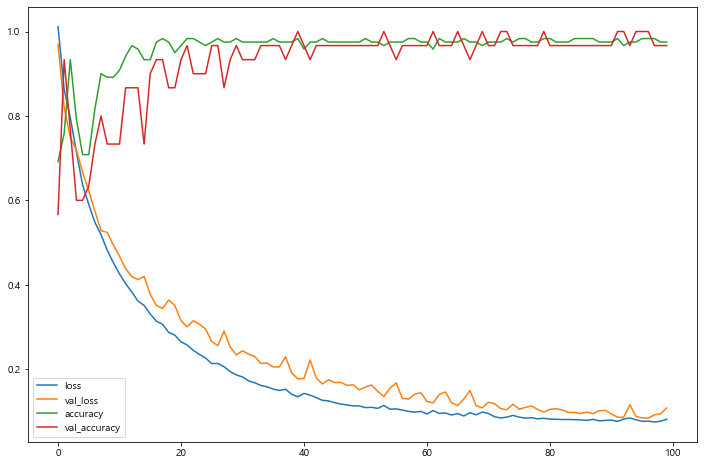

In [34]:
### 시각화
print(hist.history.keys())
plt.figure(figsize=(12, 8))
plt.plot(hist.history["loss"])
plt.plot(hist.history['val_loss'])
plt.plot(hist.history["accuracy"])
plt.plot(hist.history["val_accuracy"])
plt.legend(['loss', 'val_loss', 'accuracy', 'val_accuracy'])

In [30]:
### 모델평가

loss, acc = model.evaluate(X_test, y_test)
print(loss, acc)

30/30 [==============================] - 0s 0us/step
0.07933628559112549 1.0


In [36]:
### 예측 테스트
from sklearn.metrics import classification_report, confusion_matrix
y_pred = model.predict(X_test)
y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_pred, axis=1)

print(classification_report(y_test_class, y_pred_class))
print(confusion_matrix(y_test_class, y_pred_class))

test_set = np.array([[5, 2.9, 1, 0.2]])
print("품종예측 : ", iris["species"].unique()[model.predict_classes(test_set)])

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30

[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
품종예측 :  ['setosa']


---
<font color=red>

### DNN
</font>
    
    - 머신러닝 훈련 모델을 모듈화해봅시다

In [40]:
### 훈련모델 생성 함수 작성
def make_model(input_number, output_number, hidden_layer):
    model = Sequential()
    
    # 첫번째 레이어
    model.add(Dense(hidden_layer[0], input_shape=(input_number, ), activation='relu', name="hidden-1"))
    model.add(Dense(hidden_layer[1], activation='relu', name="hidden-2"))
    model.add(Dense(hidden_layer[2], activation='relu', name="hidden-3"))
    
    # Drop-Out 설정
    model.add(Dropout(0.2))
    
    # 출력계층
    model.add(Dense(10, activation='softmax'))
    model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
    
    return model

In [43]:
# MNIST 데이터 갖고오기
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# one-hot encoding
y_train = np_utils.to_categorical(y_train) # 데이터를 범주화시켜주는 함수
y_test = np_utils.to_categorical(y_test)

# 훈련시 2차원으로 데이터 입력해야하니까 reshape~~
X_train = X_train.reshape(60000, 28*28)/255
X_test = X_test.reshape(10000, 28*28)/255

# 훈련모델 함수 호출
input_number, output_number, hidden_layer = 784. 10. [255, 255, 255]
model = make_model(28*28, 10, [input_number, output_number, hidden_layer]) #입력(이미지)개수, 출력개수, 히든계층의 출력개수

hist = model.fit(X_train, y_train, epochs=5, batch_size=100)

Epoch 1/5
60000/60000 [==============================] - 3s 47us/step - loss: 0.2448 - accuracy: 0.9269
Epoch 2/5
60000/60000 [==============================] - 2s 40us/step - loss: 0.0952 - accuracy: 0.9713
Epoch 3/5
60000/60000 [==============================] - 2s 30us/step - loss: 0.0633 - accuracy: 0.9801
Epoch 4/5
60000/60000 [==============================] - 2s 30us/step - loss: 0.0470 - accuracy: 0.9850
Epoch 5/5
60000/60000 [==============================] - 2s 31us/step - loss: 0.0362 - accuracy: 0.9881


In [44]:
perform = model.evaluate(X_test, y_test, batch_size=100)
print(perform)

10000/10000 [==============================] - 0s 20us/step
[0.07158310614846414, 0.9786999821662903]


---
<font color=red>

### CNN
</font>

In [45]:
from keras import layers

In [49]:
# conv layer : 필터개수 32개, 필터크기 3*3
# 입력데이터 : 28*28*1(흑백)

model = Sequential()

#### layers.Conv2D(출력개수, (필터사이즈, 필터사이즈), 액티베이션, 입력개수) ; conv를 추가하기 위한 패키지
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPool2D((2, 2)))

model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPool2D((2, 2)))

model.add(layers.Conv2D(64, (3,3), activation='relu'))

### 위 데이터는 3차원이니까 FC로 넘겨주기 위해서 1차원으로 바꿔주쟈
model.add(layers.Flatten()) # 1차원으로 펼쳐주고요
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

# model.summary()

In [50]:
# MNIST 데이터 갖고오기
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# one-hot encoding
y_train = np_utils.to_categorical(y_train) # 데이터를 범주화시켜주는 함수
y_test = np_utils.to_categorical(y_test)

# Conv는 4차원으로 데이터 입력해야하니까 reshape~~
X_train = X_train.reshape(60000, 28, 28, 1)/255
X_test = X_test.reshape(10000, 28, 28, 1)/255

##################### 데이터를 잘 선별해놔야 converution을 머시기저시기 엨

# 위 셀에 작성해둠 ㅎ

#####################

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
hist = model.fit(X_train, y_train, epochs=5, batch_size=100)

Epoch 1/5
60000/60000 [==============================] - 14s 225us/step - loss: 0.2189 - accuracy: 0.9340
Epoch 2/5
60000/60000 [==============================] - 14s 228us/step - loss: 0.0552 - accuracy: 0.9832
Epoch 3/5
60000/60000 [==============================] - 14s 225us/step - loss: 0.0388 - accuracy: 0.9881
Epoch 4/5
60000/60000 [==============================] - 14s 230us/step - loss: 0.0317 - accuracy: 0.9900
Epoch 5/5
60000/60000 [==============================] - 15s 254us/step - loss: 0.0242 - accuracy: 0.9921
